<a href="https://colab.research.google.com/github/acucenarodrigues1998/Generative-AI/blob/main/04.cGAN_pix2pix_mais_aplicacoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# cGAN com pix2pix - Mais aplicações

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2508, done.
remote: Total 2508 (delta 0), reused 0 (delta 0), pack-reused 2508
Receiving objects: 100% (2508/2508), 8.19 MiB | 16.95 MiB/s, done.
Resolving deltas: 100% (1573/1573), done.


In [ ]:
%cd pytorch-CycleGAN-and-pix2pix/

/content/pytorch-CycleGAN-and-pix2pix


In [ ]:
! pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 41.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 KB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 20.6 MB/s eta 0:00:00
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408217 sha256=ed0f604fd85f513ef1fc32c956451522f7cb1db6263693e9d0e01e066c135f91
  Stored in directory: /root/.cache/pip/wheels/fb/b1/fc/b05c2c1930a412f01bd07dacaeb5fd8cc4bcccf71c835b0281

## Baixar e carregar o modelo pré-treinado

Você poderia também baixar os modelos pré-treinados aqui: https://github.com/affinelayer/pix2pix-tensorflow#datasets-and-trained-models

> Link com os modelos: http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/

Modelos disponíveis: `edges2shoes` (desenhos->sapatos), `sat2map` (satélite->mapa), `map2sat` (mapa->satélite), `facades_label2photo` (label de fachadas ->fotos de fachadas), `day2night` (dia->noite) e `edges2handbags` (desenhos->bolsas)


In [ ]:
nome_modelo = 'facades_label2photo'

In [ ]:
diretorio_modelo = "./checkpoints/{}_pretreinado/".format(nome_modelo)
diretorio_modelo

'./checkpoints/facades_label2photo_pretreinado/'

In [ ]:
!mkdir -p {diretorio_modelo}

In [ ]:
url_modelo = 'http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/{}.pth'.format(nome_modelo)
url_modelo

'http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/facades_label2photo.pth'

In [ ]:
!wget -N {url_modelo}

--2023-02-12 16:57:37--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/facades_label2photo.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217704720 (208M)
Saving to: ‘facades_label2photo.pth’

facades_label2photo 100%[===================>] 207.62M  19.3MB/s    in 12s     

2023-02-12 16:57:50 (17.0 MB/s) - ‘facades_label2photo.pth’ saved [217704720/217704720]



In [ ]:
!pwd

/content/pytorch-CycleGAN-and-pix2pix


In [ ]:
!mv /content/pytorch-CycleGAN-and-pix2pix/{nome_modelo}.pth {diretorio_modelo}latest_net_G.pth

## Download do dataset

Podemos baixar os datasets a partir do link: http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/

Lembrando que temos as seguintes opções:
* `cityscapes`, `night2day`, `edges2handbags`, `edges2shoes`, `facades`, `maps`

In [ ]:
dataset = 'facades'
arquivo_dataset = "{}.tar.gz".format(dataset)
url_dataset = f'http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/{arquivo_dataset}'
url_dataset

'http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/facades.tar.gz'

In [ ]:
!wget -N {url_dataset}

--2023-02-12 16:57:50--  http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/facades.tar.gz
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30168306 (29M) [application/x-gzip]
Saving to: ‘facades.tar.gz’

facades.tar.gz      100%[===================>]  28.77M   535KB/s    in 54s     

2023-02-12 16:58:45 (543 KB/s) - ‘facades.tar.gz’ saved [30168306/30168306]



In [ ]:
!tar -zxvf {arquivo_dataset} -C ./datasets/

facades/
facades/test/
facades/test/27.jpg
facades/test/5.jpg
facades/test/72.jpg
facades/test/1.jpg
facades/test/10.jpg
facades/test/100.jpg
facades/test/101.jpg
facades/test/102.jpg
facades/test/103.jpg
facades/test/104.jpg
facades/test/105.jpg
facades/test/106.jpg
facades/test/11.jpg
facades/test/12.jpg
facades/test/13.jpg
facades/test/14.jpg
facades/test/15.jpg
facades/test/16.jpg
facades/test/17.jpg
facades/test/18.jpg
facades/test/19.jpg
facades/test/2.jpg
facades/test/20.jpg
facades/test/21.jpg
facades/test/22.jpg
facades/test/23.jpg
facades/test/24.jpg
facades/test/25.jpg
facades/test/26.jpg
facades/test/50.jpg
facades/test/51.jpg
facades/test/52.jpg
facades/test/53.jpg
facades/test/54.jpg
facades/test/55.jpg
facades/test/56.jpg
facades/test/57.jpg
facades/test/58.jpg
facades/test/59.jpg
facades/test/6.jpg
facades/test/60.jpg
facades/test/61.jpg
facades/test/62.jpg
facades/test/63.jpg
facades/test/64.jpg
facades/test/65.jpg
facades/test/66.jpg
facades/test/67.jpg
facades/test/6

## Testando o modelo

- O algoritmo vai salvar 3 imagens para cada uma das amostras de teste: 
* `*_real_A` - a imagem de entrada, (antes da tradução) 
* `*_real_B` - a imagem "real" (modelo de referência)
* `*_fake_B` - a imagem de saída (a gerada pela GAN)

In [ ]:
!python test.py --dataroot ./datasets/{dataset} --direction BtoA --model pix2pix --name {nome_modelo}_pretreinado

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/facades            	[default: None]
             dataset_mode: aligned                       
                direction: BtoA                          	[default: AtoB]
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0            

In [ ]:
diretorio_resultados = f"./results/{nome_modelo}_pretreinado/test_latest/images/"
diretorio_resultados

'./results/facades_label2photo_pretreinado/test_latest/images/'

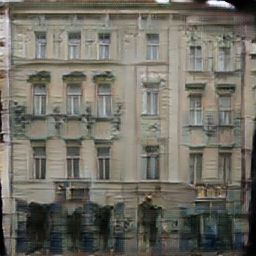

In [ ]:
img_resultado = cv2.imread(diretorio_resultados + "100_fake_B.png")
cv2_imshow(img_resultado)

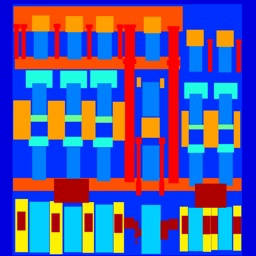

In [ ]:
img_resultado = cv2.imread(diretorio_resultados + "100_real_A.png")
cv2_imshow(img_resultado)

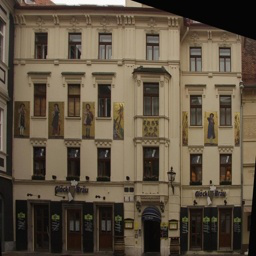

In [ ]:
img_resultado = cv2.imread(diretorio_resultados + "100_real_B.png")
cv2_imshow(img_resultado)

# Desenho para Foto

## Download do modelo

In [ ]:
nome_modelo = 'edges2shoes'
diretorio_modelo = f"./checkpoints/{nome_modelo}_pretreinado/"
!mkdir -p {diretorio_modelo}

In [ ]:
url_modelo = f'http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/{nome_modelo}.pth'
!wget -N {url_modelo}

--2023-02-12 17:10:32--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/edges2shoes.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217704688 (208M)
Saving to: ‘edges2shoes.pth’

edges2shoes.pth     100%[===================>] 207.62M  5.09MB/s    in 91s     

2023-02-12 17:12:03 (2.29 MB/s) - ‘edges2shoes.pth’ saved [217704688/217704688]



In [ ]:
!mv {nome_modelo}.pth {diretorio_modelo}latest_net_G.pth

## Carregamento das imagens de teste

In [ ]:
!mkdir -p imagens/

In [ ]:
!cp -r "/content/drive/MyDrive/O Guia Completo sobre GANs/imagens/sapatos" /content/pytorch-CycleGAN-and-pix2pix/imagens 

In [ ]:
!mv /content/pytorch-CycleGAN-and-pix2pix/imagens/sapatos /content/pytorch-CycleGAN-and-pix2pix/imagens/test

## Geração dos resultados

Parâmetros: 

* ` --dataset_mode single` - define o modo como `single` o que significa que serão imagens únicas

* `--model test` - antes o valor de `--model` era pix2pix (pois seu algoritmo é preparado para trabalhar com os datasets pareados) mas agora como estamos lidando com imagem única vamos deixar como `test`, que ainda assim irá ser Pix2Pix mas agora estamos dizendo que não queremos que ele faça o processo que fez quando era imagem em par. 

* `--netG unet_256` - especifica a rede do gerador. Antes não precisávamos dizer, mas agora que fizemos tal ajuste a gente precisa dessa alteração para indicar explicitamente que vamos usar essa arquitetura padrão.

* `--norm batch` - o mesmo caso do acima, precisamos agora passar esse parâmetro mesmo já sendo o valor "padrão". 

* Obs: e repare que o parâmetro `--direction` não foi usado também, pois não precisa invertar a direção (na verdade, nesse caso não tem direção nenhuma pois definimos que é uma imagem única, diferente do outro exemplo que foi executado em um dataset pareado)   

In [ ]:
!python test.py --dataroot ./imagens --model test --name {nome_modelo}_pretreinado --dataset_mode single --netG unet_256 --norm batch

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./imagens                     	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

## Exibição do teste com várias imagens



In [ ]:
diretorio_resultados = f"./results/{nome_modelo}_pretreinado/test_latest/images/"

In [ ]:
def exibir_resultados(nome_img, diretorio):
  img_entrada = cv2.imread(diretorio + nome_img + "_real.png")
  img_resultado = cv2.imread(diretorio + nome_img + "_fake.png")
  imgs = [img_entrada, img_resultado]
  titulo = ['Desenho (Entrada)', 'Foto (saída)']
  for i in range(len(imgs)):
    plt.subplot(1,2, i+1)
    plt.title(titulo[i])
    plt.imshow(cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB))
  plt.show()

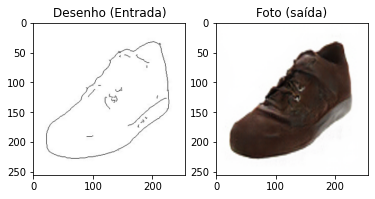

In [ ]:
img = 'desenho_sapato01'
exibir_resultados(img, diretorio_resultados)

In [ ]:
dir_imgs = 'imagens/test'
lista_imgs = [os.path.splitext(f)[0] for f in os.listdir(dir_imgs) if f.endswith('.jpg')]
lista_imgs

['desenho_sapato02_v2',
 'desenho_sapato01_v3',
 'desenho_sapato02_v3',
 'desenho_sapato01_v2',
 'desenho_sapato01',
 'desenho_sapato02',
 'desenho_sapato03',
 'desenho_sapato04',
 'desenho_sapato05']


Resultado para a imagemdesenho_sapato02_v2


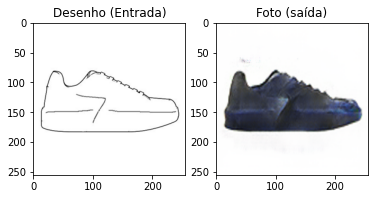


Resultado para a imagemdesenho_sapato01_v3


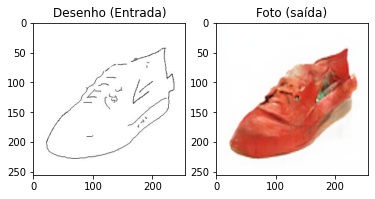


Resultado para a imagemdesenho_sapato02_v3


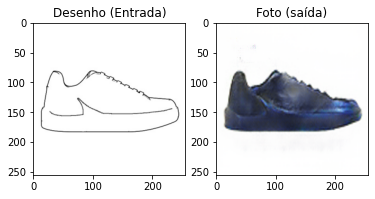


Resultado para a imagemdesenho_sapato01_v2


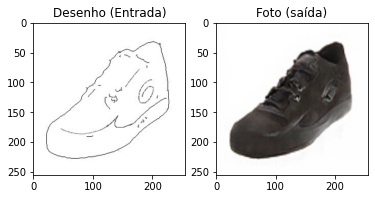


Resultado para a imagemdesenho_sapato01


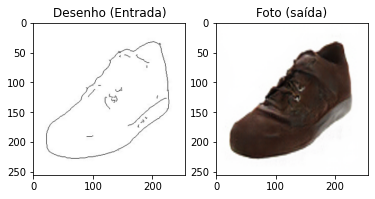


Resultado para a imagemdesenho_sapato02


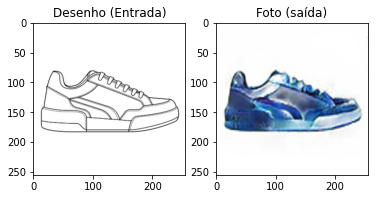


Resultado para a imagemdesenho_sapato03


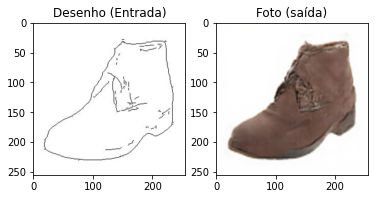


Resultado para a imagemdesenho_sapato04


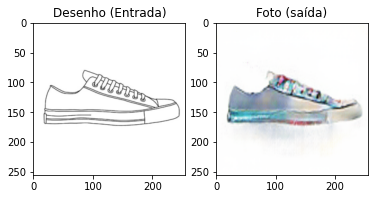


Resultado para a imagemdesenho_sapato05


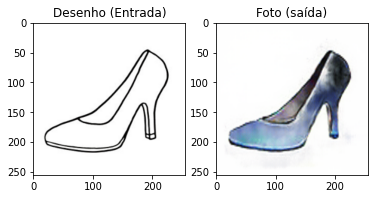

In [ ]:
for img in lista_imgs:
  print(f'\nResultado para a imagem{img}')
  exibir_resultados(img, diretorio_resultados)

# Dia para Noite

## Baixar e carregar modelo



In [ ]:
nome_modelo = 'day2night'
diretorio_modelo = f"./checkpoints/{nome_modelo}_pretreinado/"
!mkdir -p {diretorio_modelo}

In [ ]:
url_modelo = f'http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/{nome_modelo}.pth'
!wget -N {url_modelo}

--2023-02-12 17:46:04--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/day2night.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217710797 (208M)
Saving to: ‘day2night.pth’

day2night.pth       100%[===================>] 207.62M  16.0MB/s    in 16s     

2023-02-12 17:46:21 (12.8 MB/s) - ‘day2night.pth’ saved [217710797/217710797]



In [ ]:
!mv {nome_modelo}.pth {diretorio_modelo}latest_net_G.pth

## Geração dos resultados

In [ ]:
!cp "/content/drive/MyDrive/O Guia Completo sobre GANs/imagens/montanha.jpg" /content/teste

In [ ]:
!python test.py --dataroot /content/teste --model test --name {nome_modelo}_pretreinado --dataset_mode single --netG unet_256 --norm batch

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: /content/teste                	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

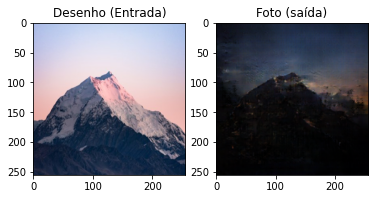

In [ ]:
diretorio_resultados = f"./results/{nome_modelo}_pretreinado/test_latest/images/"
exibir_resultados('montanha', diretorio_resultados)